In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
e = np.e
sigma_form_forward=2.5
p_form_forward=0.16
distances = np.linspace(0, 10000, 100000)
distances.size

100000

In [12]:
results_form_forward = p_form_forward * (e**(-(distances**2)/(2*(sigma_form_forward**2))))

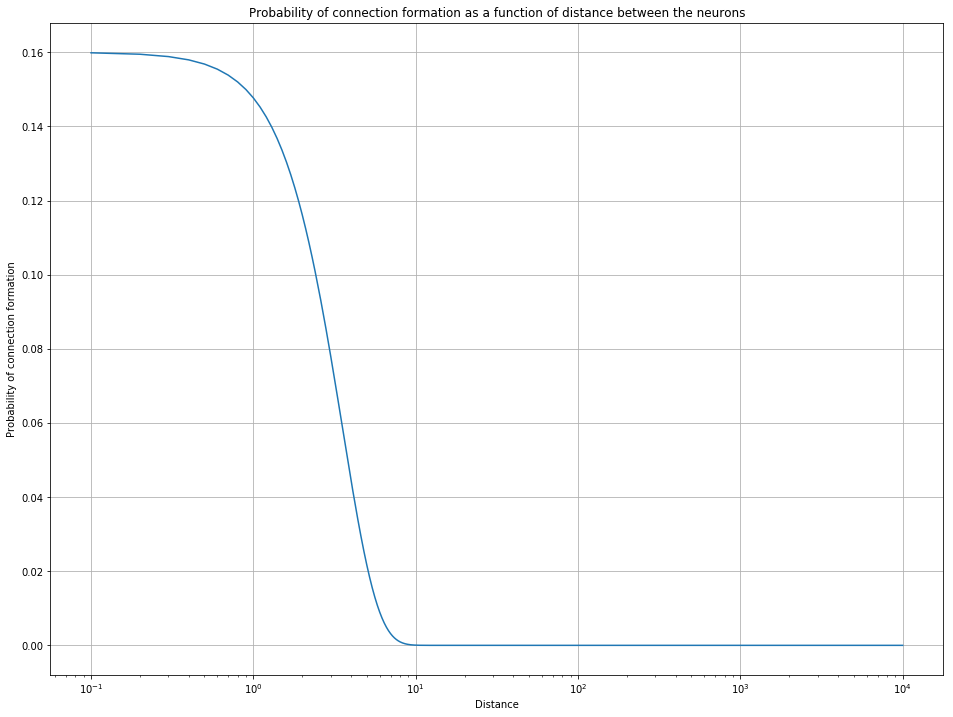

In [18]:
plt.figure(figsize=(16,12))

plt.semilogx(distances, results_form_forward)
plt.xlabel("Distance")
plt.ylabel("Probability of connection formation")
plt.title("Probability of connection formation as a function of distance between the neurons")
plt.grid(visible=True)

In [29]:
relevance = np.logical_not(
    np.isclose(results_form_forward, np.zeros(results_form_forward.size), 0,10**-5))

In [30]:
relevant_indices = np.nonzero(relevance)[0]

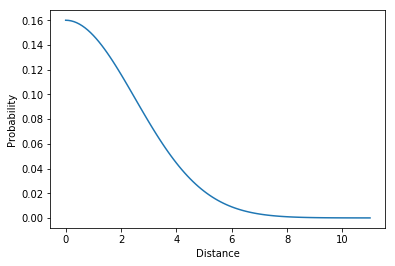

In [31]:
plt.plot(distances[relevant_indices], results_form_forward[relevant_indices])
plt.xlabel("Distance")
plt.ylabel("Probability")

## Self discussion area

I don't have much space left on SpiNNaker. Putting a table like this in DTCM might be ok, but what about comparing these values? Would this still be efficient, or would I need to transform them to something like uint16 or something?

How is the exponential decay table generated for STDP?



In [32]:
2 ** 16

65536

Will only have a look at the "relevant" probability values as defined previously

In [49]:
relevant_results = results_form_forward[relevant_indices]

In [50]:
scaled_results = relevant_results * 2**16

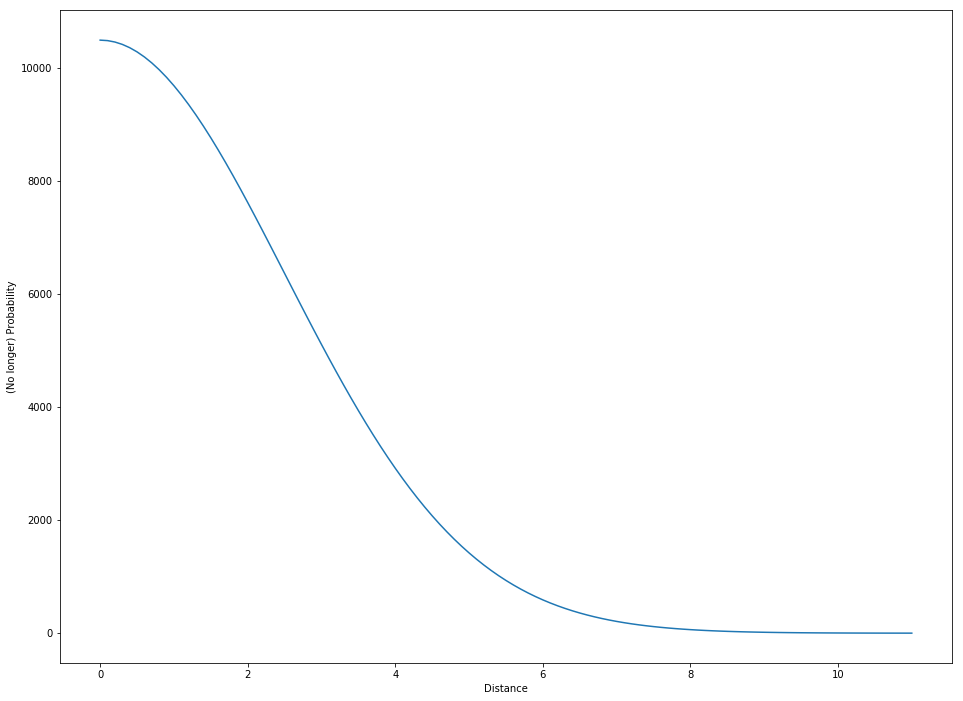

In [51]:
plt.figure(figsize=(16,12))
plt.plot(distances[relevant_indices], scaled_results)
plt.xlabel("Distance")
plt.ylabel("(No longer) Probability")

In [52]:
quantized_results = scaled_results.astype(dtype="uint32")

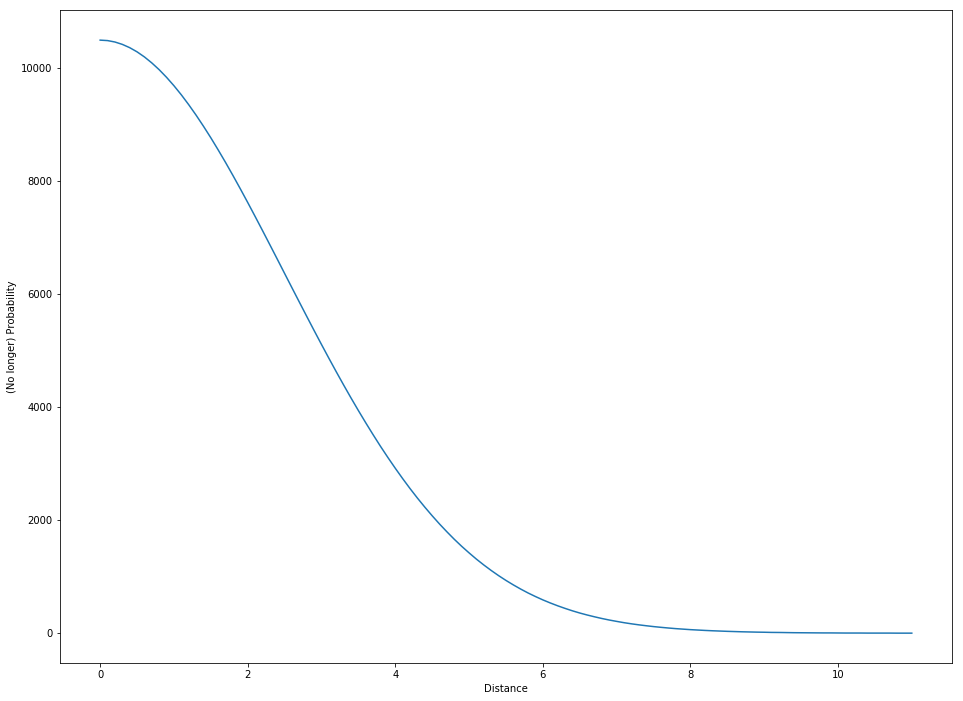

In [53]:
plt.figure(figsize=(16,12))
plt.plot(distances[relevant_indices], quantized_results)
plt.xlabel("Distance")
plt.ylabel("(No longer) Probability")

In [57]:
quantized_results.size

111

In [55]:
quantized_results

array([10485, 10477, 10452, 10410, 10352, 10278, 10188, 10082,  9962,
        9827,  9679,  9518,  9344,  9159,  8963,  8758,  8543,  8321,
        8091,  7855,  7614,  7368,  7119,  6867,  6614,  6359,  6105,
        5852,  5600,  5350,  5103,  4860,  4621,  4387,  4158,  3935,
        3718,  3507,  3302,  3105,  2915,  2732,  2556,  2388,  2228,
        2075,  1929,  1791,  1659,  1535,  1419,  1308,  1205,  1108,
        1017,   932,   853,   779,   710,   647,   588,   534,   484,
         438,   395,   356,   321,   289,   259,   232,   208,   185,
         165,   147,   131,   116,   103,    91,    80,    71,    62,
          55,    48,    42,    37,    32,    28,    24,    21,    18,
          16,    13,    12,    10,     8,     7,     6,     5,     4,
           4,     3,     2,     2,     2,     1,     1,     1,     1,
           0,     0,     0], dtype=uint32)

In [58]:
print "Size in words of the resulting table"
quantized_results.size // 2

Size in words of the resulting table


55

In [ ]:
16